In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from transformers import Trainer, TrainingArguments

train_dataset = datasets.MNIST(
    root="data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = datasets.MNIST(
    root="data",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return (F.log_softmax(x))

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)
model = Net()
def collate_fn(examples):
    pixel_values = torch.stack([example["image"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}
trainer = Trainer(
    model= model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=collate_fn
)

trainer.train()


  0%|          | 0/4690 [00:00<?, ?it/s]

TypeError: tuple indices must be integers or slices, not str

TypeError: Invalid shape (1, 28, 28) for image data

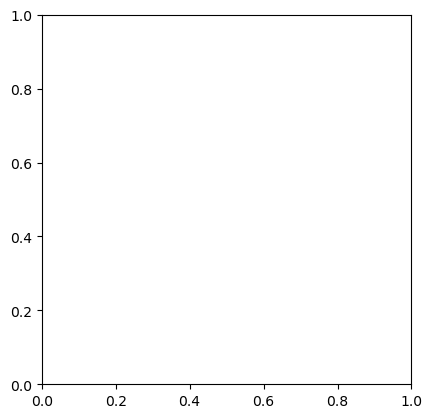

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0])


In [9]:
ipyplot.plot_images(train_dataset[0][0])

In [10]:
train_dataset[0][1]

5